In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
data = pd.read_csv("C:/Users/DELL/Downloads/archive (2)/data.csv")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235423 entries, 0 to 235422
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   image_id    235423 non-null  int64 
 1   question    235421 non-null  object
 2   answer      235423 non-null  object
 3   image_path  235423 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.2+ MB


In [13]:
data.isna().sum()

image_id      0
question      2
answer        0
image_path    0
dtype: int64

In [ ]:
data = data.dropna(subset=['question']) 

In [21]:
print("Unique images:", data['image_id'].nunique())

Unique images: 23008


In [22]:
print("Unique questions:", data['question'].nunique())

Unique questions: 57300


In [24]:
print("Unique answers:", data['answer'].nunique())

Unique answers: 108


In [23]:
print(data['question'].value_counts().head(10))

question
Are there any person in image?                  12300
How many person in image?                       12207
What is the name of the object in the image?    10275
Are there any cup in image?                      2152
Are there any bowl in image?                     2080
How many cup in image?                           1950
How many bowl in image?                          1879
Are there any vase in image?                     1566
Are there any car in image?                      1452
Are there any wine glass in image?               1418
Name: count, dtype: int64


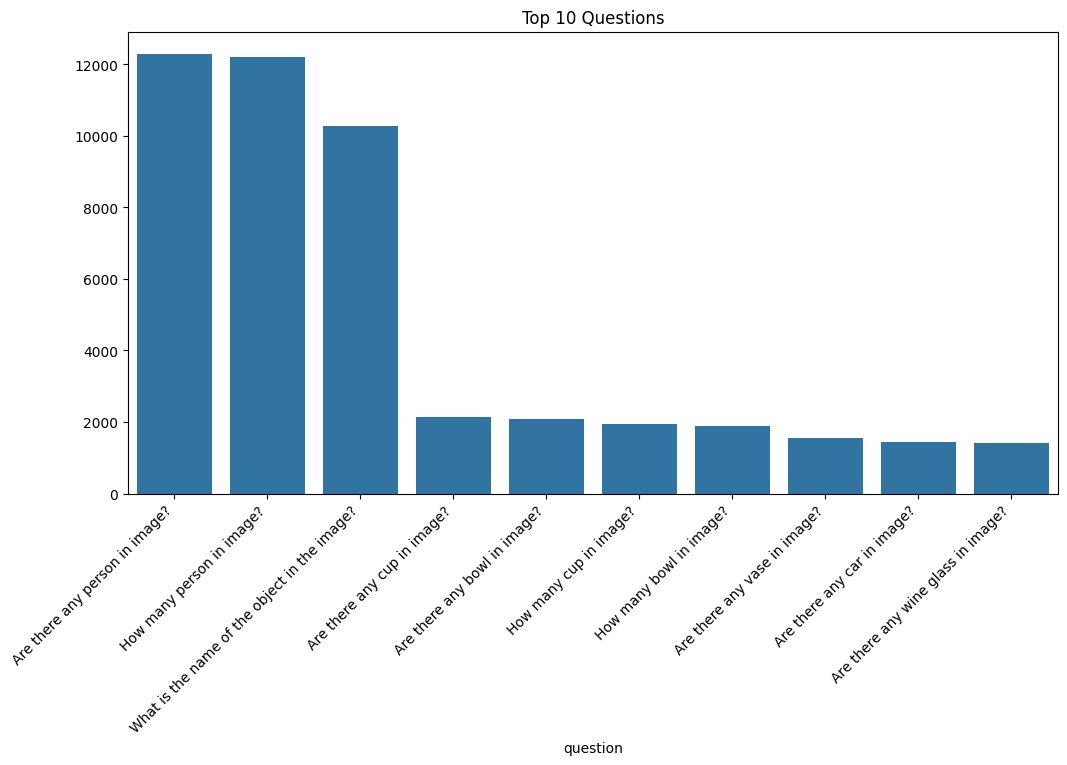

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['question'].value_counts().head(10).index, y=data['question'].value_counts().head(10).values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Questions")
plt.show()


In [25]:
print(data['answer'].value_counts().head(10))

answer
Yes       75837
No        48707
1         31900
0         18060
White      4851
Black      4316
2          4257
Red        4030
person     3789
Brown      3684
Name: count, dtype: int64


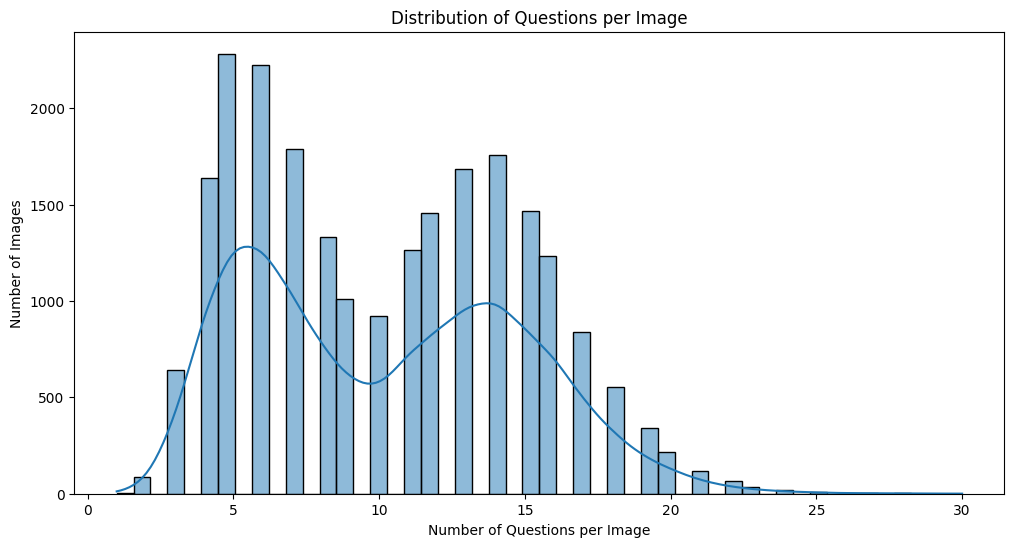

In [30]:
image_question_counts = data['image_id'].value_counts()

plt.figure(figsize=(12,6))
sns.histplot(image_question_counts, bins=50, kde=True)
plt.xlabel("Number of Questions per Image")
plt.ylabel("Number of Images")
plt.title("Distribution of Questions per Image")
plt.show()


In [57]:
yes_no_answers = ["yes", "no"]
color_answers = ["red", "blue", "green", "yellow", "black", "white", "orange", "purple", "pink", "brown", "grey"]
position_answers = ["left", "right", 'above', 'below', 'front', 'behind']
numeric_answers = data['answer'].apply(lambda x: str(x).isdigit()) 

In [58]:
color_answers_dis = {
    "Red": data[data['answer'].str.lower().isin(["red"])].shape[0],
    "Blue": data[data['answer'].str.lower().isin(["blue"])].shape[0],
    "Green": data[data['answer'].str.lower().isin(["green"])].shape[0], 
    "Yellow": data[data['answer'].str.lower().isin(["yellow"])].shape[0],
    "Black": data[data['answer'].str.lower().isin(["black"])].shape[0],
    "White": data[data['answer'].str.lower().isin(["white"])].shape[0], 
    "Orange": data[data['answer'].str.lower().isin(["orange"])].shape[0],
    "Purple": data[data['answer'].str.lower().isin(["purple"])].shape[0],   
    "Pink": data[data['answer'].str.lower().isin(["pink"])].shape[0],
    "Brown": data[data['answer'].str.lower().isin(["brown"])].shape[0],
    "Grey": data[data['answer'].str.lower().isin(["grey"])].shape[0]
    }

color_distribution = pd.DataFrame(list(color_answers_dis.items()), columns=['Color', 'Count'])

In [59]:
color_distribution

,Color,Count
0,Red,4030
1,Blue,3335
2,Green,3045
3,Yellow,2038
4,Black,4316
5,White,4851
6,Orange,1507
7,Purple,362
8,Pink,1280
9,Brown,3684


In [60]:
position_answers_dis = {
    "Left": data[data['answer'].str.lower().isin(["left"])].shape[0],
    "Right": data[data['answer'].str.lower().isin(["right"])].shape[0],
    "Above": data[data['answer'].str.lower().isin(["above"])].shape[0],
    "Below": data[data['answer'].str.lower().isin(["below"])].shape[0],
    "Front": data[data['answer'].str.lower().isin(["front"])].shape[0],
    "Behind": data[data['answer'].str.lower().isin(["behind"])].shape[0]
    }

position_distribution = pd.DataFrame(list(position_answers_dis.items()), columns=['Position', 'Count'])

In [61]:
position_distribution

,Position,Count
0,Left,3415
1,Right,3059
2,Above,3300
3,Below,1407
4,Front,1869
5,Behind,2307


In [65]:
answer_types = {
    "Yes/No": data[data['answer'].str.lower().isin(yes_no_answers)].shape[0],
    "Color": data[data['answer'].str.lower().isin(color_answers)].shape[0],
    "Position": data[data['answer'].str.lower().isin(position_answers)].shape[0],
    "Numeric": numeric_answers.sum(),
    "Object": data.shape[0] - (numeric_answers.sum() +
                            data[data['answer'].str.lower().isin(yes_no_answers)].shape[0] +
                            data[data['answer'].str.lower().isin(color_answers)].shape[0] +
                            data[data['answer'].str.lower().isin(position_answers)].shape[0])
}
answer_distribution = pd.DataFrame(list(answer_types.items()), columns=['Answer Type', 'Count'])

In [66]:
answer_distribution

,Answer Type,Count
0,Yes/No,124544
1,Color,28645
2,Position,15357
3,Numeric,56628
4,Object,10249


In [67]:
object_answers = data[~data['answer'].str.lower().isin(yes_no_answers) &
                   ~data['answer'].str.lower().isin(color_answers) &
                   ~data['answer'].str.lower().isin(position_answers) &
                   ~numeric_answers]

top_objects = object_answers['answer'].value_counts().head(20)

object_distribution = pd.DataFrame(top_objects).reset_index()
object_distribution.columns = ['Object Name', 'Count']

object_distribution

,Object Name,Count
0,person,3789
1,bird,677
2,cat,394
3,dog,382
4,vase,377
5,teddy bear,286
6,bowl,278
7,airplane,266
8,clock,265
9,horse,255


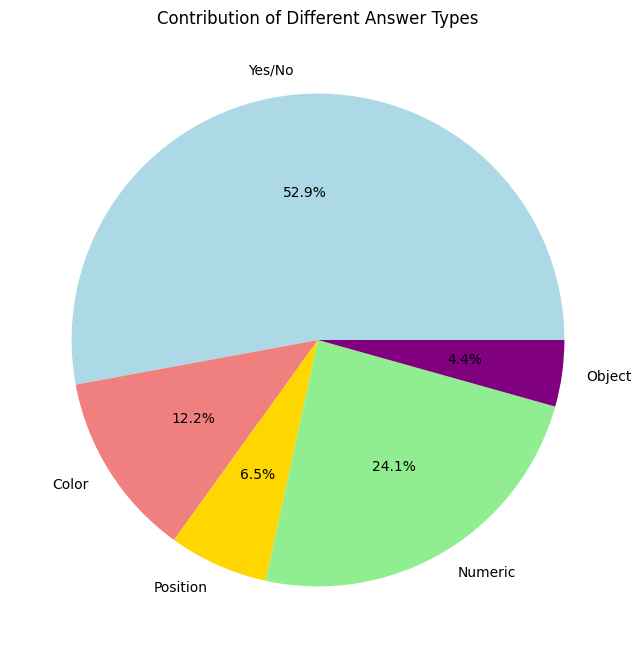

In [68]:
plt.figure(figsize=(8, 8))
plt.pie(answer_types.values(), labels=answer_types.keys(), autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'gold', 'lightgreen', 'purple'])
plt.title("Contribution of Different Answer Types")
plt.show()

In [ ]:
yes_no_questions = data[data['answer'].str.lower().isin(yes_no_answers)]['question'].value_counts().head(10)
numeric_questions = data[numeric_answers]['question'].value_counts().head(10)
color_questions = data[data['answer'].str.lower().isin(color_answers)]['question'].value_counts().head(10)
position_questions = data[data['answer'].str.lower().isin(position_answers)]['question'].value_counts().head(10)

print("Top 10 Questions Leading to Yes/No Answers:\n", yes_no_questions)
print("\nTop 10 Questions Leading to Numeric Answers:\n", numeric_questions)
print("\nTop 10 Questions Leading to Color Answers:\n", color_questions)
print("\nTop 10 Questions Leading to Position Answers:\n", position_questions)

Top 10 Questions Leading to Yes/No Answers:
 question
Are there any person in image?          12300
Are there any cup in image?              2152
Are there any bowl in image?             2080
Are there any vase in image?             1566
Are there any car in image?              1452
Are there any wine glass in image?       1418
Are there any dining table in image?     1371
Are there any dog in image?              1354
Are there any bird in image?             1338
Are there any bottle in image?           1331
Name: count, dtype: int64

Top 10 Questions Leading to Numeric Answers:
 question
How many person in image?          12207
How many cup in image?              1950
How many bowl in image?             1879
How many vase in image?             1368
How many car in image?              1284
How many dog in image?              1182
How many wine glass in image?       1175
How many dining table in image?     1151
How many bottle in image?           1129
How many bird in image?            

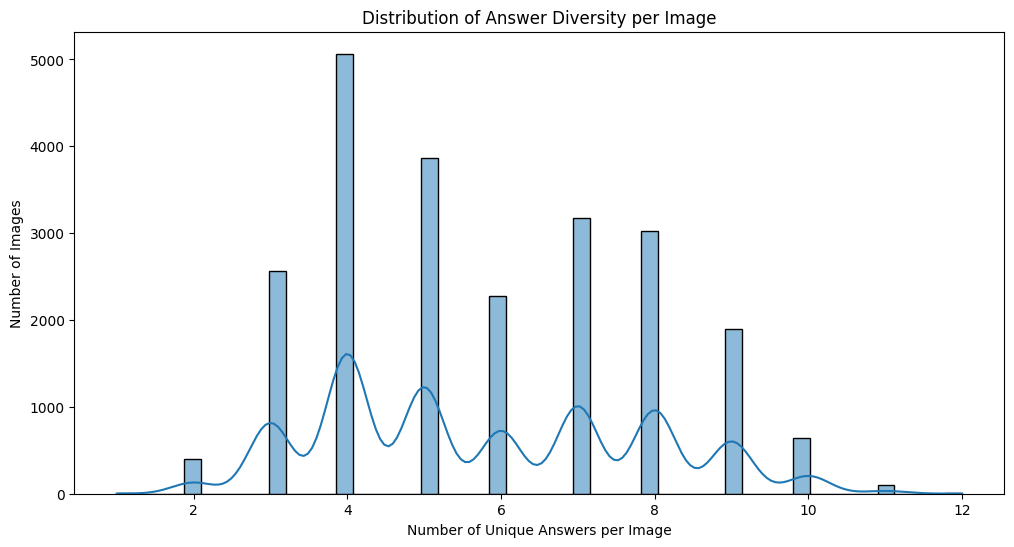

In [ ]:
image_answer_counts = data.groupby('image_id')['answer'].nunique()

plt.figure(figsize=(12,6))
sns.histplot(image_answer_counts, bins=50, kde=True)
plt.xlabel("Number of Unique Answers per Image")
plt.ylabel("Number of Images")
plt.title("Distribution of Answer Diversity per Image")
plt.show()